In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.DataFrame(pd.read_csv("full_data.csv"))
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
df.shape

(4981, 11)

In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [5]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot: >

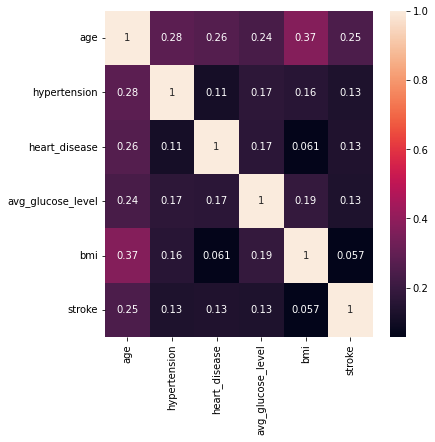

In [6]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)

In [7]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


<AxesSubplot: xlabel='stroke', ylabel='count'>

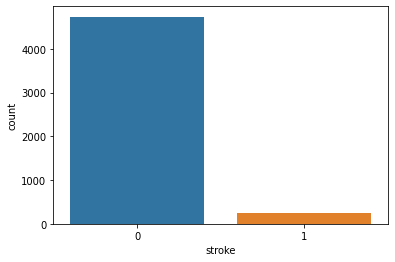

In [8]:
sns.countplot(x="stroke", data=df)

<AxesSubplot: xlabel='gender', ylabel='count'>

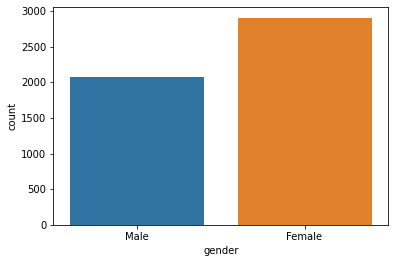

In [9]:
sns.countplot(x="gender", data=df)

<AxesSubplot: xlabel='heart_disease', ylabel='count'>

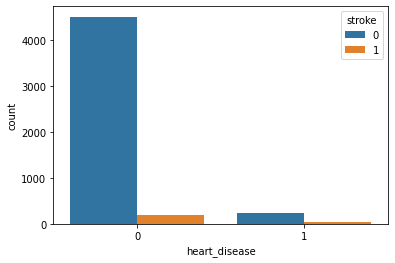

In [10]:
sns.countplot(data=df, x="heart_disease", hue="stroke")

<AxesSubplot: xlabel='gender', ylabel='count'>

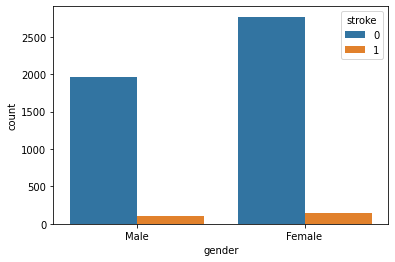

In [11]:
sns.countplot(data=df, x="gender", hue="stroke")

<AxesSubplot: xlabel='ever_married', ylabel='count'>

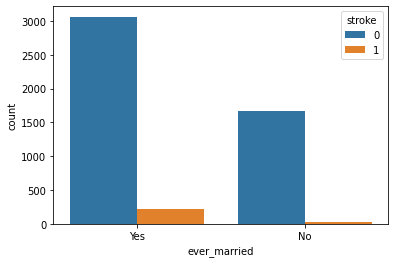

In [12]:
sns.countplot(data=df, x="ever_married", hue="stroke")

<AxesSubplot: xlabel='bmi', ylabel='Count'>

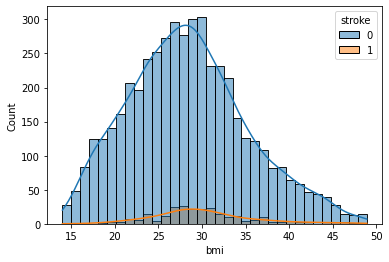

In [13]:
sns.histplot(data=df, x="bmi", hue="stroke", kde=True)

<AxesSubplot: xlabel='smoking_status', ylabel='count'>

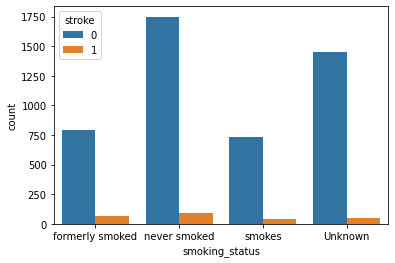

In [14]:
sns.countplot(data=df, x="smoking_status", hue="stroke")

<AxesSubplot: xlabel='hypertension', ylabel='count'>

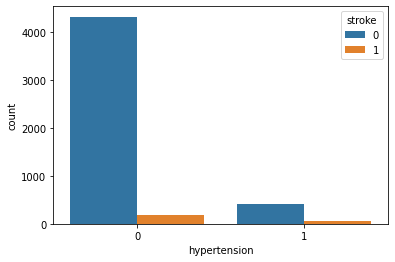

In [15]:
sns.countplot(data=df, x="hypertension", hue="stroke")

<AxesSubplot: xlabel='work_type', ylabel='count'>

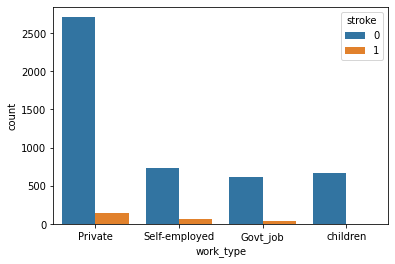

In [16]:
sns.countplot(data=df, x="work_type", hue="stroke")

<AxesSubplot: xlabel='Residence_type', ylabel='count'>

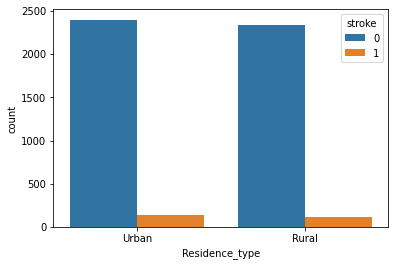

In [17]:
sns.countplot(data=df, x="Residence_type", hue="stroke")

<AxesSubplot: xlabel='bmi'>

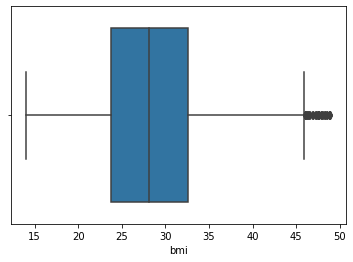

In [18]:
##finding outliers
sns.boxplot(data=df, x="bmi", hue="stroke")

<AxesSubplot: xlabel='age'>

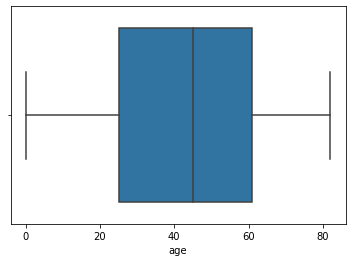

In [19]:
sns.boxplot(data=df, x="age", hue="stroke")

<AxesSubplot: xlabel='avg_glucose_level'>

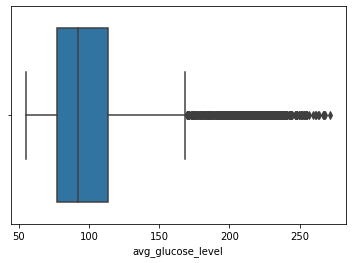

In [20]:
sns.boxplot(data=df, x="avg_glucose_level", hue="stroke")

<Figure size 720x720 with 0 Axes>

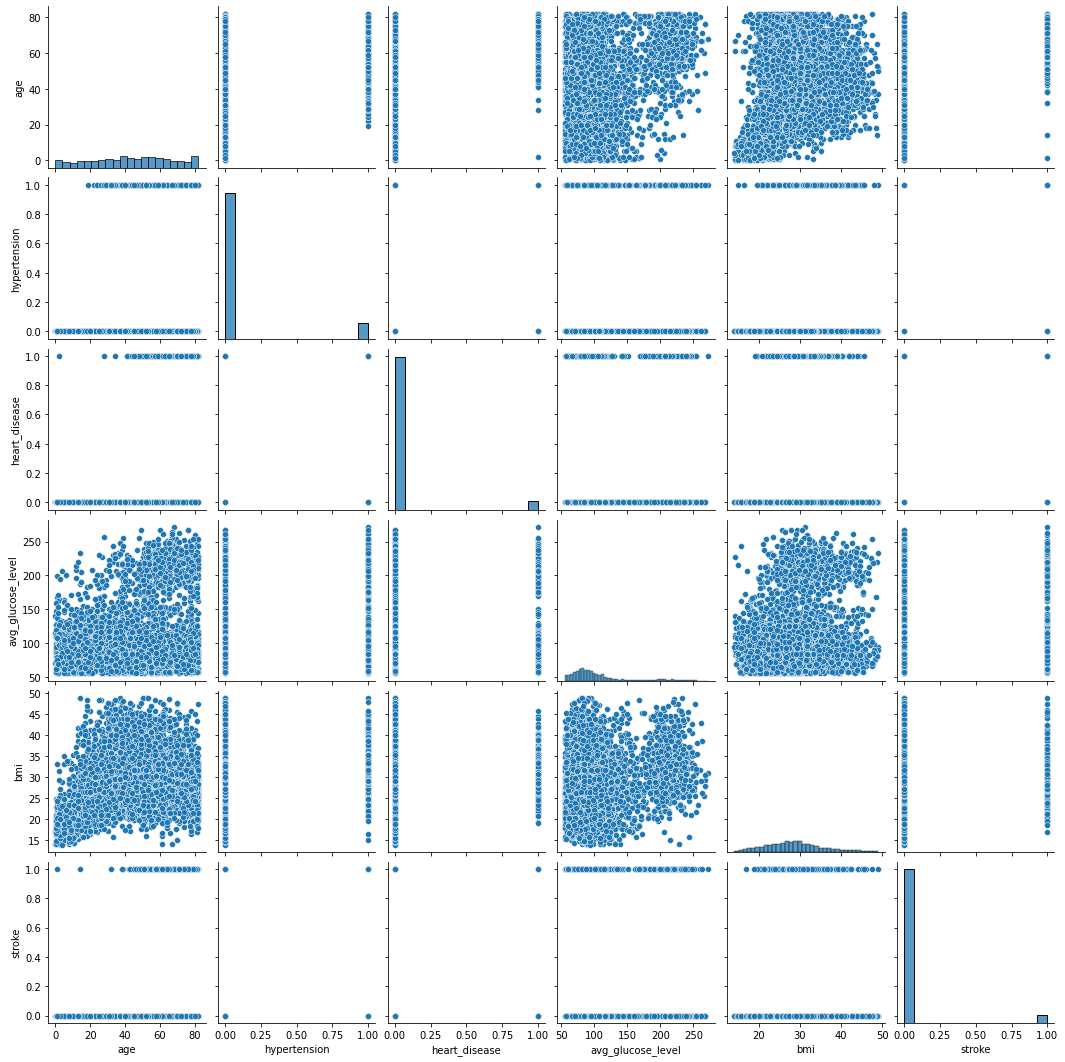

In [21]:
plt.figure(figsize=(10,10))
sns.pairplot(df)

In [3]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()

In [4]:
df["gender"] = l1.fit_transform(df["gender"])
df["ever_married"] = l1.fit_transform(df["ever_married"])
df["work_type"] = l1.fit_transform(df["work_type"])
df["Residence_type"] = l1.fit_transform(df["Residence_type"])
df["smoking_status"] = l1.fit_transform(df["smoking_status"])

In [5]:
x = df.drop('stroke',axis=1)
y = df ['stroke']

In [6]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all',random_state=1)
x_smt, y_smt = smt.fit_resample(x, y)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_smt = scaler.fit_transform(x_smt)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smt,y_smt,test_size=0.3)

# ANN

In [28]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [29]:
tuner = kt.Hyperband(
    hypermodel=build_model,
    objective='val_accuracy',
    max_epochs=30,
    factor=3,
    hyperband_iterations=1,
    seed=42,
    overwrite=True)

In [30]:
tuner.search(x=x_train, 
             y=y_train, 
             validation_split=0.2, 
             callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)],
             epochs=30)

Trial 90 Complete [00h 00m 10s]
val_accuracy: 0.9231456518173218

Best val_accuracy So Far: 0.9347631931304932
Total elapsed time: 00h 12m 07s
INFO:tensorflow:Oracle triggered exit


In [31]:
#Showing 10 best trials:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 14
units_0: 384
units_1: 288
learning_rate: 0.0001
units_2: 448
units_3: 320
units_4: 192
units_5: 256
units_6: 448
units_7: 192
units_8: 224
units_9: 64
units_10: 160
units_11: 512
units_12: 512
units_13: 32
units_14: 256
units_15: 96
units_16: 160
units_17: 128
units_18: 288
units_19: 352
tuner/epochs: 30
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9347631931304932
Trial summary
Hyperparameters:
num_layers: 16
units_0: 128
units_1: 256
learning_rate: 0.0001
units_2: 256
units_3: 64
units_4: 96
units_5: 416
units_6: 352
units_7: 416
units_8: 320
units_9: 448
units_10: 64
units_11: 384
units_12: 288
units_13: 224
units_14: 128
units_15: 256
units_16: 416
units_17: 224
units_18: 320
units_19: 320
tuner/epochs: 30
tuner/initial_epoch: 10
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0077
Score: 0.9329758882522583
Trial summary
Hyperparameters:
num_layers: 

In [32]:
best_hp = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hp)

model_hisotry = model.fit(x=x_train,
                          y=y_train,
                          validation_split=0.2,
                          epochs=30)

Epoch 1/30
140/140 [==============================] - 4s 13ms/step - loss: 0.4295 - accuracy: 0.7992 - val_loss: 0.2866 - val_accuracy: 0.8794
Epoch 2/30
140/140 [==============================] - 2s 12ms/step - loss: 0.2860 - accuracy: 0.8836 - val_loss: 0.2714 - val_accuracy: 0.8883
Epoch 3/30
140/140 [==============================] - 2s 12ms/step - loss: 0.2600 - accuracy: 0.8948 - val_loss: 0.2508 - val_accuracy: 0.8928
Epoch 4/30
140/140 [==============================] - 2s 12ms/step - loss: 0.2476 - accuracy: 0.8995 - val_loss: 0.2456 - val_accuracy: 0.8972
Epoch 5/30
140/140 [==============================] - 2s 12ms/step - loss: 0.2236 - accuracy: 0.9118 - val_loss: 0.2549 - val_accuracy: 0.8990
Epoch 6/30
140/140 [==============================] - 2s 12ms/step - loss: 0.2196 - accuracy: 0.9106 - val_loss: 0.2316 - val_accuracy: 0.9080
Epoch 7/30
140/140 [==============================] - 2s 12ms/step - loss: 0.2030 - accuracy: 0.9187 - val_loss: 0.2241 - val_accuracy: 0.9133

In [33]:
val_acc_per_epoch = model_hisotry.history['val_loss']
best_epoch = val_acc_per_epoch.index(min(val_acc_per_epoch)) + 1
print('Best epoch = ', best_epoch)

Best epoch =  10


In [34]:
final_model = tuner.hypermodel.build(best_hp)

final_model_history = final_model.fit(x=x_train,
                                      y=y_train,
                                      validation_split=0.2, 
                                      epochs=best_epoch)

Epoch 1/10
140/140 [==============================] - 4s 14ms/step - loss: 0.4219 - accuracy: 0.8416 - val_loss: 0.3136 - val_accuracy: 0.8722
Epoch 2/10
140/140 [==============================] - 2s 13ms/step - loss: 0.2773 - accuracy: 0.8890 - val_loss: 0.2662 - val_accuracy: 0.8954
Epoch 3/10
140/140 [==============================] - 2s 13ms/step - loss: 0.2541 - accuracy: 0.8981 - val_loss: 0.2685 - val_accuracy: 0.8803
Epoch 4/10
140/140 [==============================] - 2s 12ms/step - loss: 0.2375 - accuracy: 0.9075 - val_loss: 0.2739 - val_accuracy: 0.8937
Epoch 5/10
140/140 [==============================] - 2s 13ms/step - loss: 0.2249 - accuracy: 0.9106 - val_loss: 0.2601 - val_accuracy: 0.9017
Epoch 6/10
140/140 [==============================] - 2s 13ms/step - loss: 0.2112 - accuracy: 0.9160 - val_loss: 0.2279 - val_accuracy: 0.9124
Epoch 7/10
140/140 [==============================] - 2s 13ms/step - loss: 0.1917 - accuracy: 0.9265 - val_loss: 0.2230 - val_accuracy: 0.9133

In [35]:
from sklearn.metrics import classification_report
model_preds = final_model.predict(x_test)
for i in range(len(model_preds)):
    if model_preds[i] >= 0.5:
        model_preds[i] = 1
    elif model_preds[i] < 0.5:
        model_preds[i] = 0
        
ANN_classifier_report = classification_report(y_test, model_preds , output_dict=True, zero_division=1)
ANN_results = pd.DataFrame(ANN_classifier_report).transpose()

ANN_results

75/75 [==============================] - 1s 4ms/step


,precision,recall,f1-score,support
0,0.956923,0.868715,0.910688,1074.000000
1,0.900914,0.968278,0.933382,1324.000000
accuracy,0.923686,0.923686,0.923686,0.923686
macro avg,0.928918,0.918497,0.922035,2398.000000
weighted avg,0.925999,0.923686,0.923218,2398.000000


# Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [11]:
prediction = naive_bayes.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, prediction)
confusion

array([[ 836,  225],
       [ 160, 1177]], dtype=int64)

0.8394495412844036

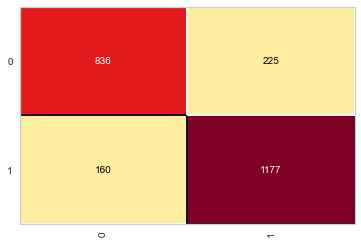

In [15]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_bayes)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)


In [19]:
classification_naive_gaussian = (classification_report(y_test, prediction))

In [20]:
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1061
           1       0.84      0.88      0.86      1337

    accuracy                           0.84      2398
   macro avg       0.84      0.83      0.84      2398
weighted avg       0.84      0.84      0.84      2398



In [40]:
from sklearn.metrics import accuracy_score
nb_score = float(str(accuracy_score(y_test, prediction) * 100)[:5])
nb_score


83.94

0.8511259382819016

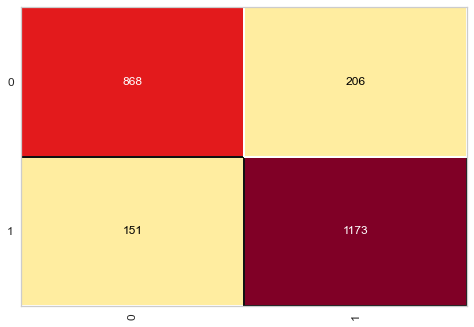

In [48]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [49]:
classification_naive_gaussian_standard = classification_report(y_test, prediction)

In [50]:
print(classification_naive_gaussian_standard)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1074
           1       0.85      0.89      0.87      1324

    accuracy                           0.85      2398
   macro avg       0.85      0.85      0.85      2398
weighted avg       0.85      0.85      0.85      2398



0.8511259382819016

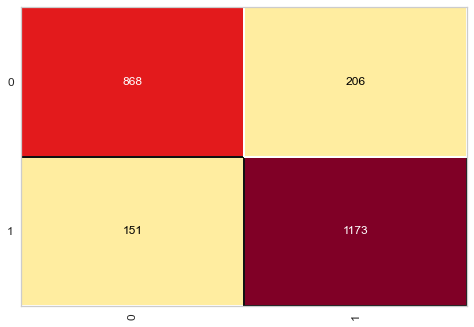

In [51]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [52]:
classification_naive_gaussian_minmax = classification_report(y_test, prediction)

In [53]:
print(classification_naive_gaussian_minmax)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1074
           1       0.85      0.89      0.87      1324

    accuracy                           0.85      2398
   macro avg       0.85      0.85      0.85      2398
weighted avg       0.85      0.85      0.85      2398



# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver="liblinear",random_state=0)

# fit the model with data
model=logreg.fit(x_train, y_train)

#y_pred = logreg.predict(x_test)
model

LogisticRegression(random_state=0, solver='liblinear')

In [43]:
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [44]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[ 883,  178],
       [ 112, 1225]], dtype=int64)

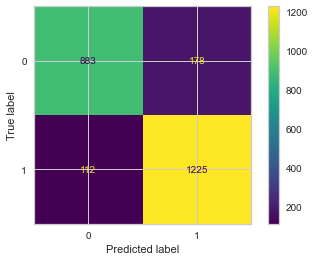

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
#disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()
plt.show()

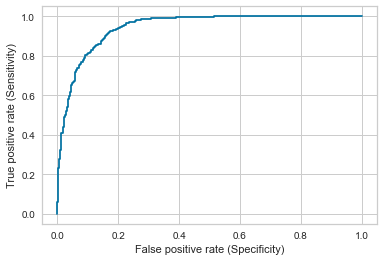

In [46]:
from sklearn.metrics import roc_curve
prob_predict = logreg.predict_proba(x_test)[::,1]

fpr , tpr ,_ = metrics.roc_curve(y_test,prob_predict)

#creating the roc curve
plt.plot(fpr,tpr)
plt.ylabel("True positive rate (Sensitivity)")
plt.xlabel("False positive rate (Specificity)")
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1061
           1       0.87      0.92      0.89      1337

    accuracy                           0.88      2398
   macro avg       0.88      0.87      0.88      2398
weighted avg       0.88      0.88      0.88      2398



In [49]:
from sklearn.metrics import accuracy_score
lr_score = float(str(accuracy_score(y_test, y_pred) * 100)[:5])
lr_score

87.9

# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)



KNeighborsClassifier(n_neighbors=3)

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
y_valid_preds = knn.predict(x_test)
#Evaluation
precision = metrics.accuracy_score(y_test,y_valid_preds) * 100

print(classification_report(y_test,y_valid_preds))
print("Accuracy with K-NN: {0:.2f}%".format(precision))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1061
           1       0.89      0.97      0.93      1337

    accuracy                           0.91      2398
   macro avg       0.92      0.91      0.91      2398
weighted avg       0.92      0.91      0.91      2398

Accuracy with K-NN: 91.28%


In [53]:
knn3 = precision
knn3

91.28440366972477

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
y_valid_preds = knn.predict(x_test)
#Evaluation
precision = metrics.accuracy_score(y_test,y_valid_preds) * 100

print(classification_report(y_test,y_valid_preds))
print("Accuracy with K-NN: {0:.2f}%".format(precision))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1061
           1       0.88      0.97      0.92      1337

    accuracy                           0.91      2398
   macro avg       0.92      0.90      0.90      2398
weighted avg       0.91      0.91      0.91      2398

Accuracy with K-NN: 90.62%


In [56]:
knn5 = precision
knn5

90.61718098415345

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
y_valid_preds = knn.predict(x_test)
#Evaluation
precision = metrics.accuracy_score(y_test,y_valid_preds) * 100

print(classification_report(y_test,y_valid_preds))
print("Accuracy with K-NN: {0:.2f}%".format(precision))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1061
           1       0.87      0.95      0.91      1337

    accuracy                           0.89      2398
   macro avg       0.90      0.88      0.89      2398
weighted avg       0.89      0.89      0.89      2398

Accuracy with K-NN: 89.03%


In [59]:
knn10 = precision
knn10

89.0325271059216

# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

scores = []
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

rfc_score = float(str(accuracy_score(y_test, y_pred) * 100)[:5])
scores.append(('Random Forest Classification',rfc_score))
rfc_score

95.7

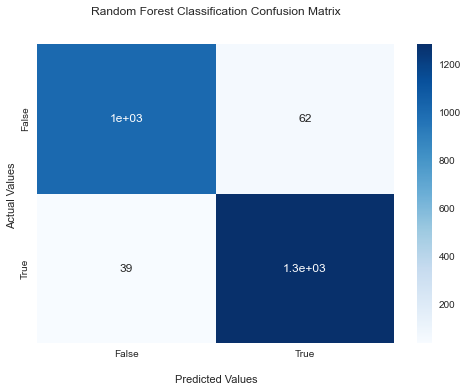

In [69]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Random Forest Classification Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [70]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1074
           1       0.95      0.97      0.96      1324

    accuracy                           0.96      2398
   macro avg       0.96      0.96      0.96      2398
weighted avg       0.96      0.96      0.96      2398



# CART - Decision Tree

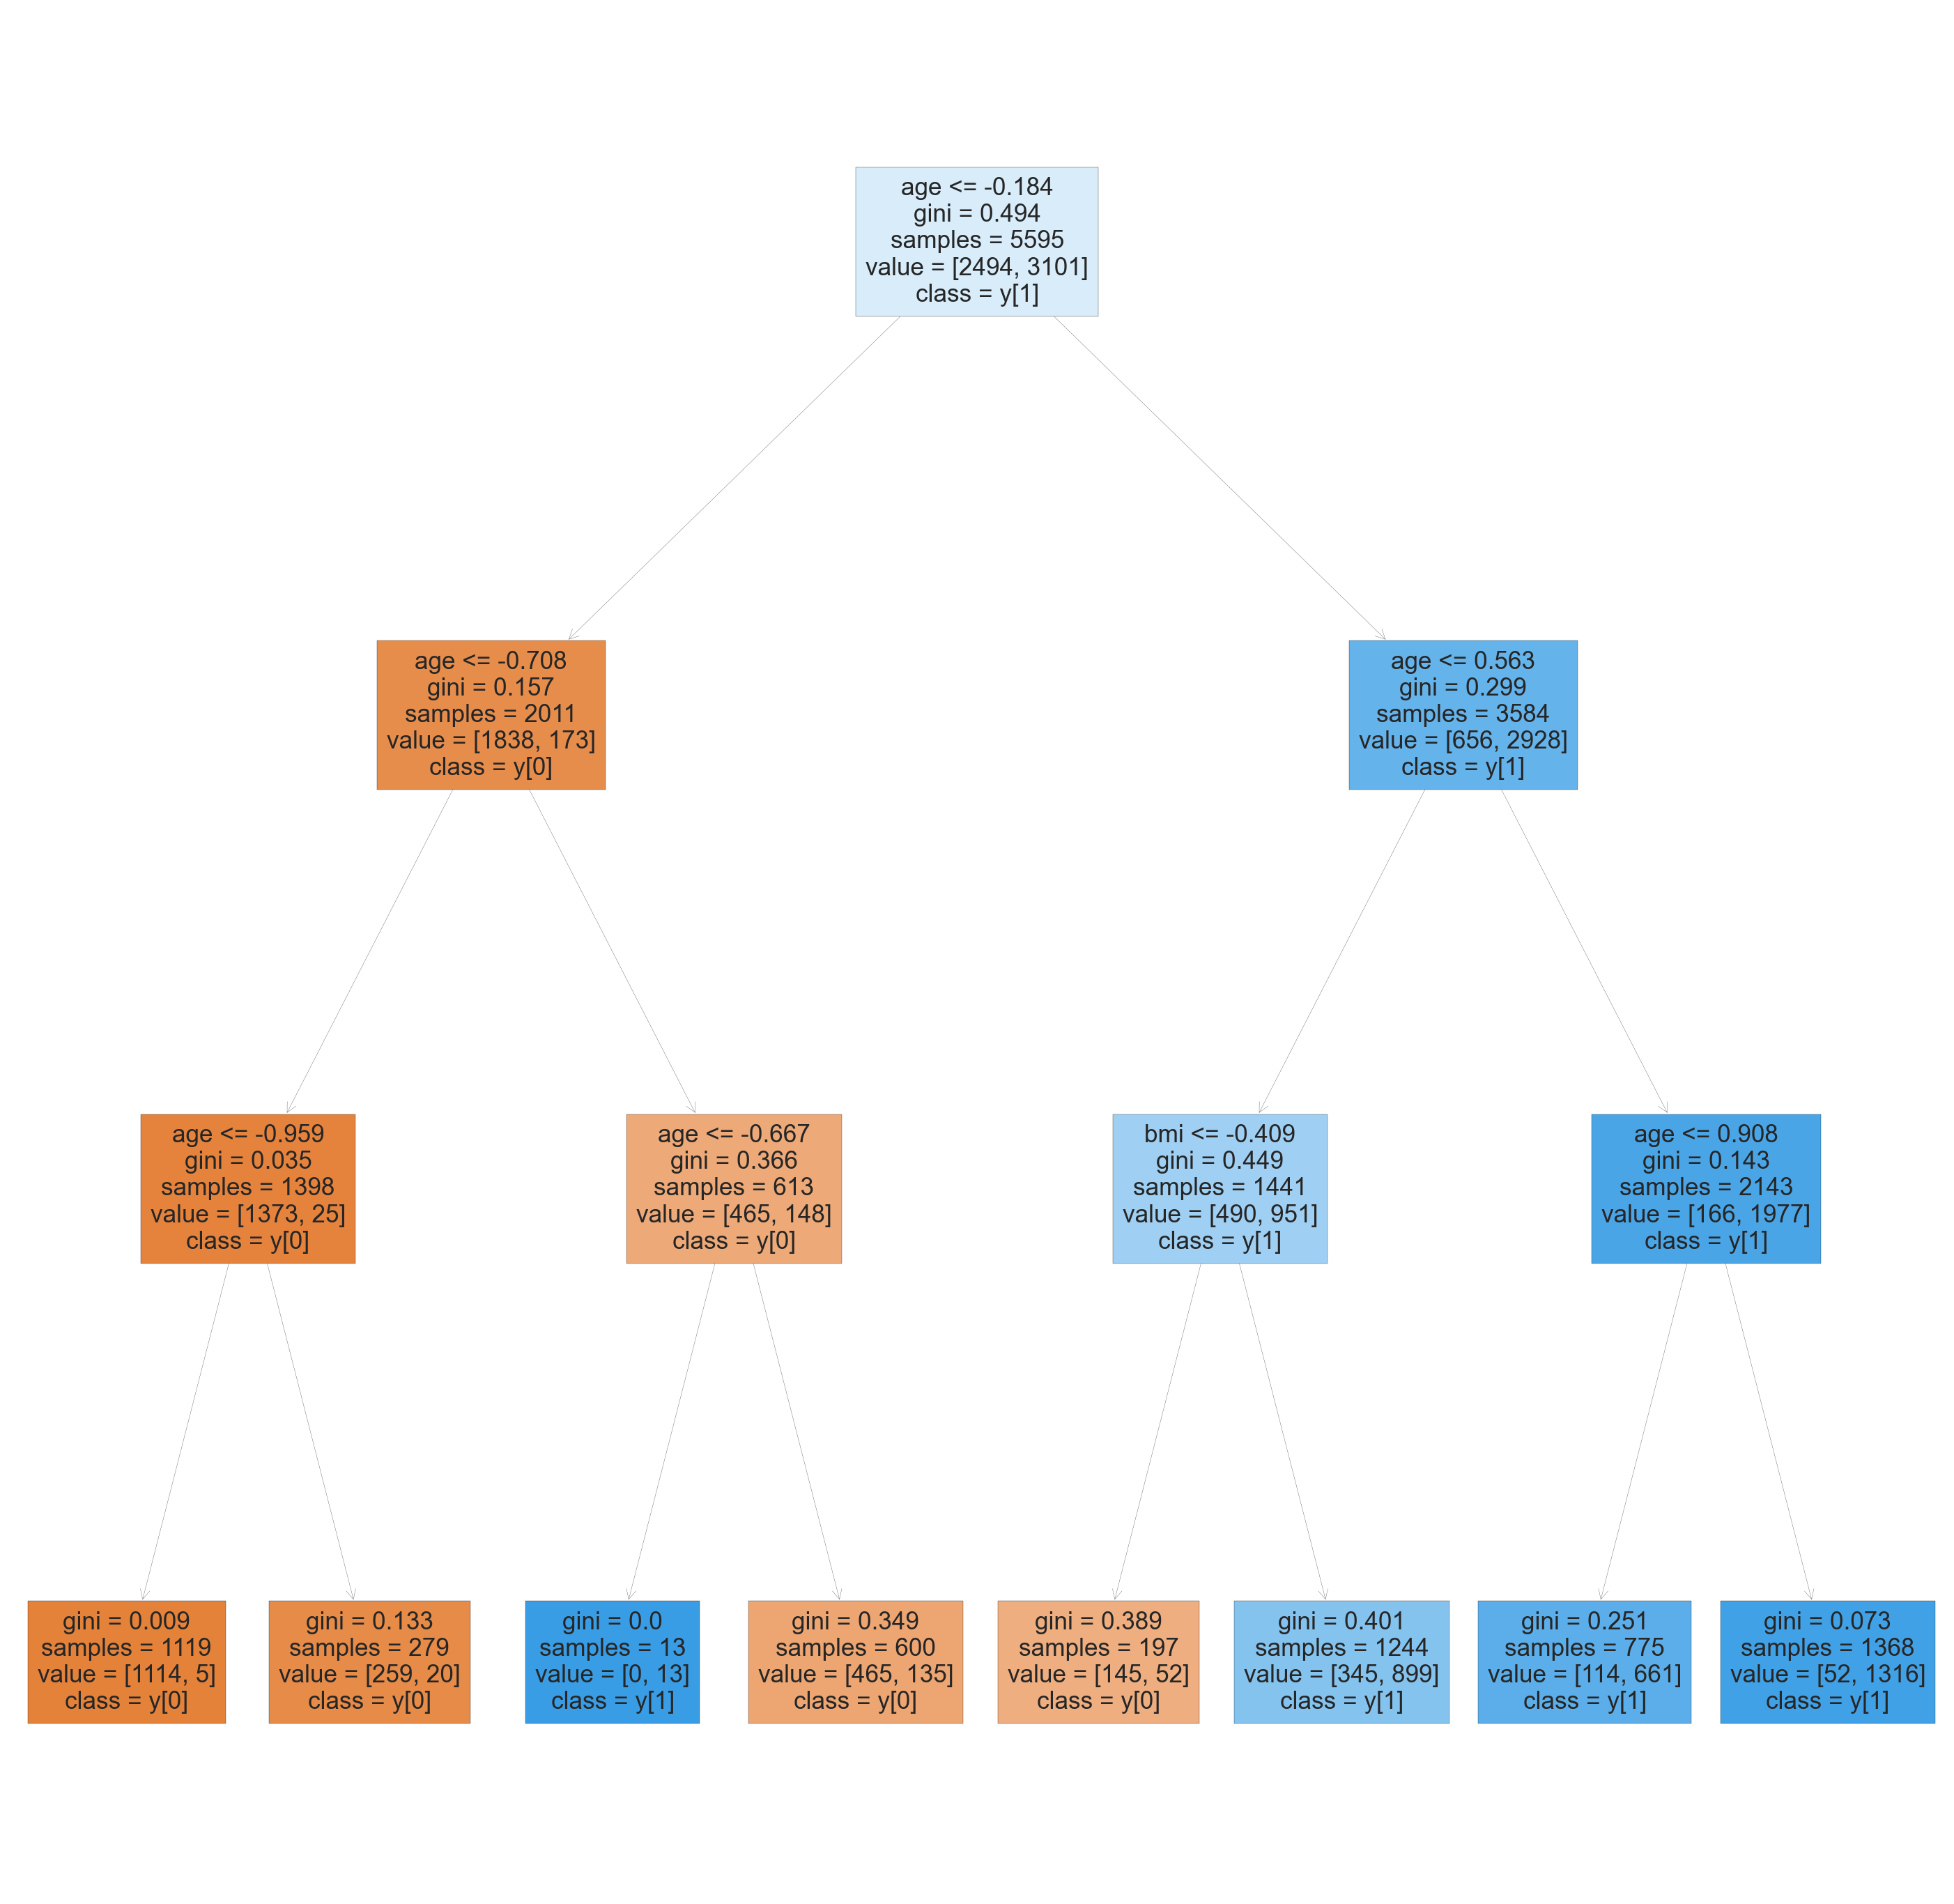

In [63]:
##CART Algorithm###
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=3)
clf = clf.fit(x_train,y_train)
plt.figure(figsize=(50, 50))
#f=tree.plot_tree(clf,filled=True,class_names=True,feature_names=["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level","bmi","smoking_status"])
f=tree.plot_tree(clf,filled=True,class_names=True,feature_names=df.columns[:-1])

In [64]:
predict = clf.predict(x_test)

In [65]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test,predict)
cnf_matrix

array([[ 825,  236],
       [  76, 1261]], dtype=int64)

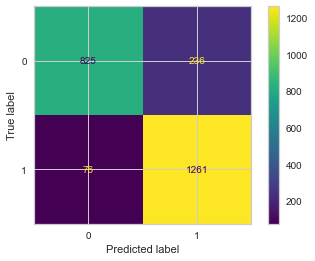

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
#disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()
plt.show()

In [67]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1061
           1       0.84      0.94      0.89      1337

    accuracy                           0.87      2398
   macro avg       0.88      0.86      0.87      2398
weighted avg       0.87      0.87      0.87      2398



In [68]:
cart_score = float(str(accuracy_score(y_test, predict) * 100)[:5])
cart_score

86.98

# SVM

Accuracy:  90.49207673060884 %


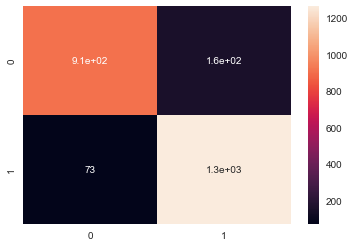

In [69]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(x_train, y_train)

y_test_pred = svc.predict(x_test)

# calculate statistics
accuracy_ = accuracy_score(y_test, y_test_pred)

print("Accuracy: ", accuracy_ * 100, "%")

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
plt.show()

In [70]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1061
           1       0.89      0.95      0.92      1337

    accuracy                           0.90      2398
   macro avg       0.91      0.90      0.90      2398
weighted avg       0.91      0.90      0.90      2398



In [71]:
svc_score = float(str(accuracy_score(y_test, y_test_pred) * 100)[:5])
svc_score

90.49

# C5.0 - Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) 
clf.fit(X_train_scaled_upsample, y_train_upsamle)
 
# Predict on training set
pred_y = clf.predict(X_train_scaled) 

# How's our Fbeta?
print('on train-set scores (over-fitting):')
print('test-set')
print('Fb: '+ str(metrics.fbeta_score(y_train, pred_y, beta=4)) )
print('recall:' + str(metrics.recall_score(y_train, pred_y)) )
print('precision:' + str(metrics.precision_score(y_train, pred_y)) )
print()

# Predict on training set
pred_y = clf.predict(X_test_scaled)

# How's our Fbeta?
print('on test-set scores (very low):')
print('Fb: '+ str(metrics.fbeta_score(y_test, pred_y, beta=4)) )
print('recall:' + str(metrics.recall_score(y_test, pred_y)) )
print('precision:' + str(metrics.precision_score(y_test, pred_y)) )
print()

NameError: name 'X_train_scaled_upsample' is not defined

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train_scaled_upsample.columns).sort_values(ascending=False)
feature_imp

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Summary

In [83]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.5) # Number of the items in the minority class will be 50% of the majority class

x_under, y_under = undersample.fit_resample(x, y)
print('x under sampled shape: ', x_under.shape)
print('y under sampled shape: ', y_under.shape)


pd.DataFrame(y_under).value_counts()

from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import StratifiedKFold # For imbalanced datasets
from sklearn.model_selection import KFold           # For balanced datasets
from sklearn.model_selection import cross_validate


def model_evaluation(x, y):
    models = []
    names = []
    scoring = ['accuracy', 'precision', 'recall', 'f1']

    models.append(('SVC', SVC()))
    models.append(('DTC', DecisionTreeClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('ANN', MLPClassifier()))
    models.append(('LR', LogisticRegression()))
   

    df_results = pd.DataFrame(columns=['Algorithm', 'Acc Mean', 'Acc STD', 'Pre Mean', 'Pre STD', 
                                       'Rec Mean', 'Rec STD', 'F1 Mean', 'F1 STD'])
    results_acc = []
    results_pre = []
    results_rec = []
    results_f1 = []
    for name, model in models:
        names.append(name)
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
        result = cross_validate(model, x, y, cv=kfold, scoring=scoring)
    
        # Accuracy
        acc_mean = result['test_accuracy'].mean()
        acc_std = result['test_accuracy'].std()

        # Precision
        pre_mean = result['test_precision'].mean()
        pre_std = result['test_precision'].std()

        # Recall
        rec_mean = result['test_recall'].mean()
        rec_std = result['test_recall'].std()

        #F1-Score
        f1_mean = result['test_f1'].mean()
        f1_std = result['test_f1'].std()

        df_result_row = {'Algorithm': name, 'Acc Mean': acc_mean, 'Acc STD': acc_std, 'Pre Mean': pre_mean, 
                         'Pre STD': pre_std, 'Rec Mean': rec_mean, 'Rec STD': rec_std, 'F1 Mean': f1_mean, 
                         'F1 STD': f1_std}
        
        df_results = df_results.append(df_result_row, ignore_index=True)
        results_acc.append(result['test_accuracy'])
        results_pre.append(result['test_precision'])
        results_rec.append(result['test_recall'])
        results_f1.append(result['test_f1'])

    df_results = df_results.set_index('Algorithm')
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    # Display the mean and standard deviation of all metrics for all algorithms
    print(df_results)
    
    # Display the overall results in a boxplot graph
    plot_objects = plt.subplots(nrows=1, ncols=4, figsize=(14, 6))
    fig, (ax1, ax2, ax3, ax4) = plot_objects
    
    ax1.boxplot(results_acc)
    ax1.set_title('Accuracy', fontsize=14)
    ax1.set_xticklabels(names)
    ax2.boxplot(results_pre)
    ax2.set_title('Precision', fontsize=14)
    ax2.set_xticklabels(names)
    ax3.boxplot(results_rec)
    ax3.set_title('Recall', fontsize=14)
    ax3.set_xticklabels(names)
    ax4.boxplot(results_f1)
    ax4.set_title('F1-Score', fontsize=14)
    ax4.set_xticklabels(names)

    plt.show()
   
 

x under sampled shape:  (744, 10)
y under sampled shape:  (744,)


c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

           Acc Mean  Acc STD  Pre Mean  Pre STD  Rec Mean  Rec STD  F1 Mean  \
Algorithm                                                                     
SVC           0.767    0.043     0.646    0.072     0.681    0.084    0.660   
DTC           0.684    0.044     0.527    0.070     0.529    0.105    0.524   
KNN           0.727    0.052     0.602    0.112     0.576    0.081    0.585   
RF            0.738    0.047     0.612    0.074     0.576    0.105    0.591   
NB            0.742    0.051     0.608    0.079     0.608    0.131    0.606   
ANN           0.723    0.045     0.612    0.116     0.556    0.151    0.564   
LR            0.774    0.052     0.668    0.079     0.640    0.113    0.651   

           F1 STD  
Algorithm          
SVC         0.066  
DTC         0.078  
KNN         0.079  
RF          0.086  
NB          0.101  
ANN         0.087  
LR          0.089  


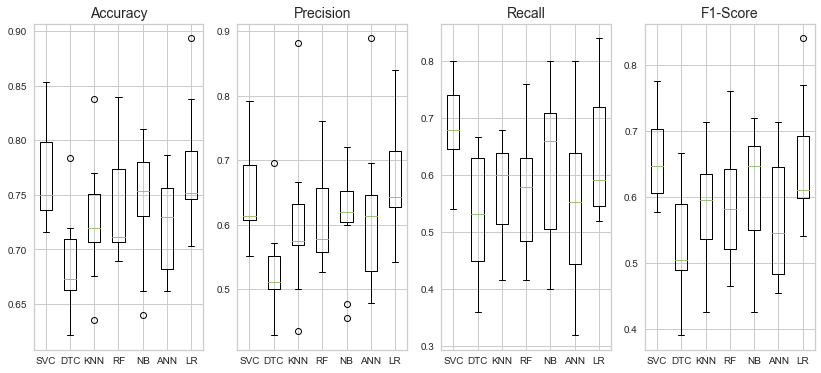

In [84]:

    # Evaluate algorithms with undersampling
    model_evaluation(x_under, y_under)

# Trial Summary

In [72]:
nb_score

83.94

In [77]:
print(knn3)
print(knn5)
print(knn10)

print(rfc_score)
print(lr_score)
print(cart_score)
print(svc_score)

91.28440366972477
90.61718098415345
89.0325271059216
95.7
87.9
86.98
90.49


In [80]:
acc = []
acc.append(nb_score)
acc.append(knn3)
acc.append(knn5)
acc.append(knn10)
acc.append(rfc_score)
acc.append(lr_score)
acc.append(cart_score)
acc.append(svc_score)

acc

[83.94,
 91.28440366972477,
 90.61718098415345,
 89.0325271059216,
 95.7,
 87.9,
 86.98,
 90.49]

<BarContainer object of 8 artists>

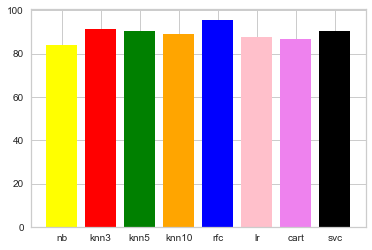

In [87]:
plt.bar(["nb","knn3","knn5","knn10","rfc","lr","cart","svc"], height=acc, color=["yellow","red","green","orange","blue","pink","violet","black"])